In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('label',axis='columns'),df['label'],test_size=0.2,random_state=0)

In [3]:
X_train.shape

(33600, 784)

In [4]:
X_test.shape

(8400, 784)

In [17]:
X_train.iloc[0]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 39317, Length: 784, dtype: int64

In [23]:
digits=np.array(X_train.iloc[6].values)
digits

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  4

In [24]:
len(X_train.columns)

784

In [25]:
digits=digits.reshape(28,28)
digits.shape

(28, 28)

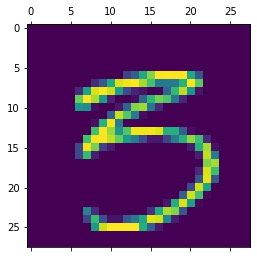

In [26]:
import matplotlib.pyplot as plt
plt.matshow(digits)

In [27]:
type(X_train)

pandas.core.frame.DataFrame

In [28]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()

In [29]:
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [62]:
import tensorflow as tf
model=tf.keras.Sequential([
    tf.keras.layers.Dense(300,input_shape=(784,),activation='relu'),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(60,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')

])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1050/1050 [==============================] - 5s 4ms/step - loss: 2.6319 - accuracy: 0.7782
Epoch 2/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2139 - accuracy: 0.9408
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1656 - accuracy: 0.9518
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1487 - accuracy: 0.9572
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1288 - accuracy: 0.9628
Epoch 6/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1109 - accuracy: 0.9688
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0893 - accuracy: 0.9741
Epoch 8/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0829 - accuracy: 0.9750
Epoch 9/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0746 - accuracy: 0.9793
Epoch 10/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.074

In [63]:
model.evaluate(X_test,y_test)

263/263 [==============================] - 1s 2ms/step - loss: 0.1795 - accuracy: 0.9630


[0.17952747642993927, 0.9629762172698975]

In [64]:
y_predicted=model.predict(X_test)

In [65]:
y_predicted_labels=np.array([np.argmax(i)for i in y_predicted])
y_predicted_labels[:10]

array([3, 4, 9, 5, 6, 5, 6, 0, 0, 1], dtype=int64)

In [66]:
y_test[:10]

array([3, 6, 9, 5, 6, 5, 6, 0, 0, 1], dtype=int64)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       813
           1       0.85      0.98      0.91       961
           2       0.89      0.99      0.94       860
           3       0.97      0.94      0.95       863
           4       0.69      0.98      0.81       827
           5       0.96      0.94      0.95       756
           6       0.97      0.58      0.73       841
           7       0.92      0.72      0.81       899
           8       0.95      0.92      0.94       768
           9       0.95      0.93      0.94       812

    accuracy                           0.90      8400
   macro avg       0.91      0.90      0.89      8400
weighted avg       0.91      0.90      0.89      8400



In [68]:
type(y_predicted_labels)

numpy.ndarray

In [69]:
type(y_test)

numpy.ndarray

In [70]:
df_test=pd.read_csv('test.csv')
df_test=df_test.to_numpy()
df_test.shape

(28000, 784)

In [71]:
df_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  10,  17,  17,  17,  17,  81, 180, 180,
        35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 139, 253, 253, 253, 253, 253,
       253, 253,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  60, 228, 253, 25

In [72]:
y_pred=model.predict(df_test)

In [73]:
y_pred_labels=np.array([np.argmax(i)for i in y_pred])
y_pred_labels[:5]

array([2, 0, 9, 9, 3], dtype=int64)

In [74]:
imageid=np.arange(1,len(y_pred_labels)+1)
len(imageid)

28000

In [75]:
len(y_pred_labels)

28000

In [76]:
d={'ImageId':np.arange(1,28001),'Label':y_pred_labels}
result=pd.DataFrame(d)

In [77]:
result.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [80]:
result.to_csv('sample_submission_1.csv',index=False)

In [81]:
result.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
